## Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [4]:
w = 0.9
b = 0.1
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

In [5]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

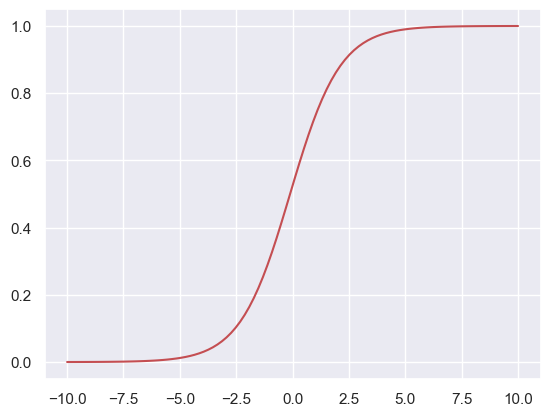

In [6]:
plt.plot(X, Y, color ="r")
plt.show()

$S_{w_1, w_2, b}(x_1, x_2) =\frac{1}{1 + e^(-(w_1x_1 + w_2x_2 + b))}$

In [7]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(w1 * x1 + w2 * x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [9]:
from mpl_toolkits import mplot3d

In [10]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 80)

XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (80,) (80, 100) (80, 100)


In [11]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

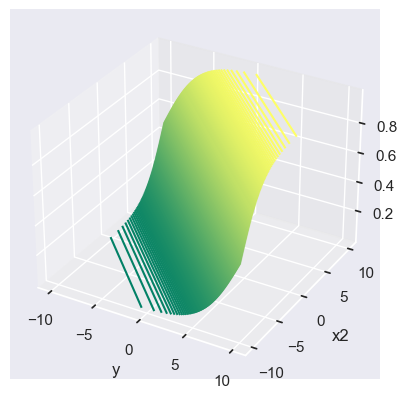

In [12]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.contour3D(XX1, XX2, Y, 200, cmap = 'summer')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlabel('y')
plt.show()

### Computing Loss

In [13]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

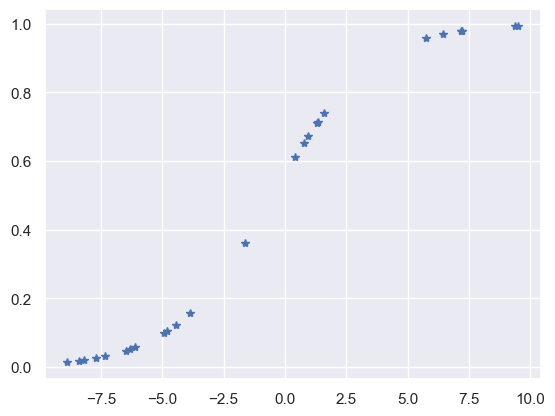

In [14]:
plt.plot(X, Y, '*');

In [15]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est)) ** 2
    return loss

In [16]:
W = np.linspace(-1, 1, 200)
B = np.linspace(-1, 1, 200)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(200, 200)

In [18]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

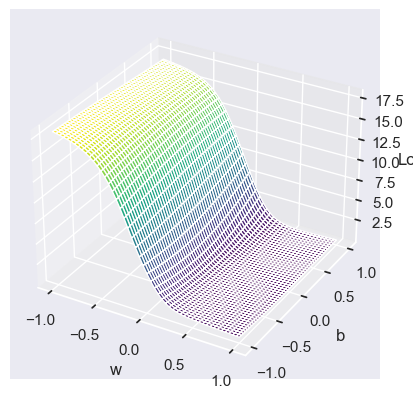

In [19]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW, BB, Loss,  cmap = "viridis")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

## Sigmoid Neuron Class

In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
class SigmoidNeuron:

    def __init__(self) -> None:
        self.w = None
        self.b = None 
 
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    

    def fit(self, X, Y, epochs = 10, learning_rate = 1, initialize = False, display_loss = False):

        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0


        if display_loss:
            loss = {}

        for i in range(epochs):
            dw = 0
            db = 0

            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i]  = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')



    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

### Fitting for Toy Data

In [100]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, 4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [101]:
sn = SigmoidNeuron()
sn.fit(X, Y, learning_rate= 0.05, initialize= True, display_loss= True, epochs= 200)

C:\Users\anubh\AppData\Local\Temp\ipykernel_23384\1102665210.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in  tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [23]:
print(sn.w, sn.b)

[[2.52085476 0.15663744]] [0.06936418]


In [24]:
def plot_sn(X, Y, sn):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))

    plt.contourf(XX1, XX2, YY, cmap = "summer", alpha = 0.6)
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'binary')
    plt.plot()

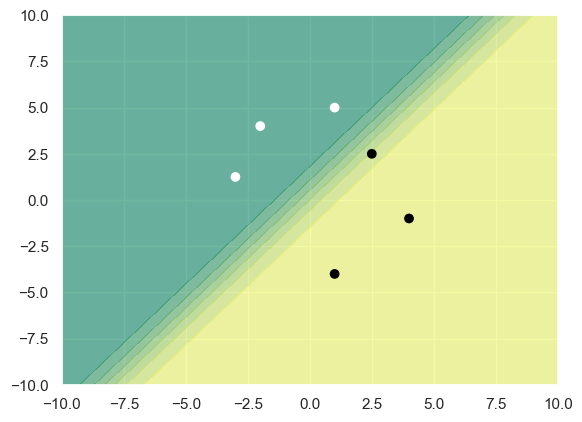

In [95]:
plot_sn(X, Y, sn)

### Custom Dataset

In [28]:
import pandas as pd
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
for col in data.columns:
    print(data[col].nunique())

41
2
4
49
152
2
3
91
2
40
3
5
4
2


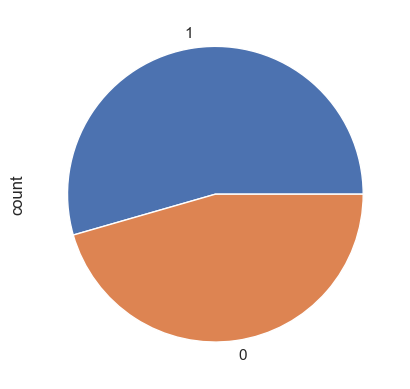

In [42]:
data['output'].value_counts().plot(kind = "pie");

In [32]:
X = data.drop('output', axis= 1)
y = data['output']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

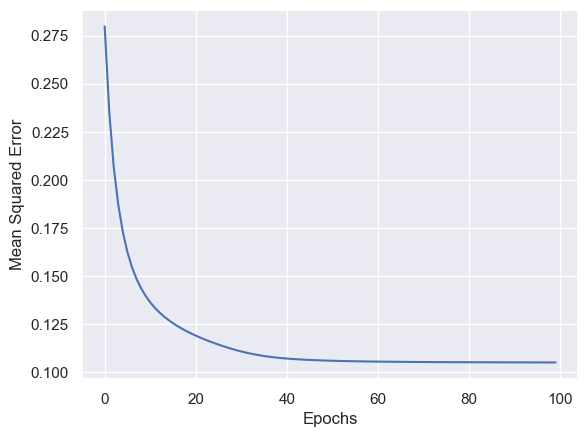

In [85]:
sn = SigmoidNeuron()
sn.fit(X_train, y_train, learning_rate= 0.02, initialize= True, epochs= 100, display_loss= True)

In [86]:
Y_pred_train = sn.predict(X_train).ravel()
Y_pred_test = sn.predict(X_test).ravel()

In [87]:
y_train.shape, Y_pred_train.shape

((242,), (242,))

In [88]:
Y_pred_train = (Y_pred_train > 0.5).astype("int")
Y_pred_test = (Y_pred_test > 0.5).astype("int")

In [89]:
from sklearn.metrics import accuracy_score
print("Accuracy on training set: ", accuracy_score(Y_pred_train, y_train))
print("Accuracy on testing set: ", accuracy_score(Y_pred_test, y_test))


Accuracy on training set:  0.8677685950413223
Accuracy on testing set:  0.8032786885245902
